In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
df=df.reset_index(drop=True)

In [4]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Flown with BA four times. As an...,5.0,2024-08-25,United Kingdom,False,verified flown ba four time anxious traveller ...
1,✅ Trip Verified | You may never see your ref...,10.0,2024-08-22,United States,True,may never see refund cancelled return flight s...
2,Not Verified | Cargo service: that's how I fel...,1.0,2024-08-21,United States,False,verified cargo service felt upper deck suppose...
3,✅ Trip Verified | Inefficient and slow airport...,5.0,2024-08-21,United Kingdom,True,inefficient slow airport operation resting lau...
4,Not Verified | The customer service is one of...,4.0,2024-08-18,United States,False,verified customer service one worst ever seen ...


### What is average overall rating given for British Airways?

In [5]:
df.stars.mean()

4.581807780320366

### What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

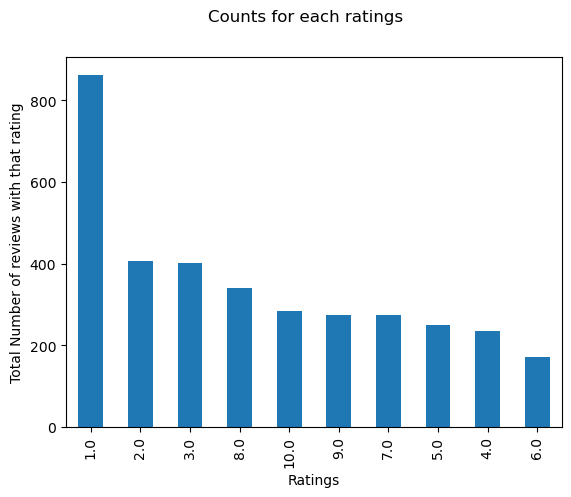

In [6]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

### Which country provided on average highest ratings?

In [26]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
print(df['stars'].isnull().sum())
df = df.dropna(subset=['stars'])

0


In [27]:
# Group by country, calculate the mean star rating, sort, and reset the index
df_country_rating = df.groupby('country').mean()['stars'].sort_values(ascending=False).reset_index()

# Display the result
print(df_country_rating.head())


TypeError: Could not convert ✅ Trip Verified |  Frankfurt to Buenos Aires via London in October 2019. The aircraft is very old with small screens and ample entertainment, which becomes an issue flying +10hrs. The 1 hour layover was a complete disaster. The staff was unfriendly and inconsiderate to me. ✅ Trip Verified |  Kuala Lumpur to Glasgow via London. The service started, first some drinks. On my aisle was a female attendant and a young male attendant.  I asked for an ale, the attendant pretended not to understand what I was asking for. I repeated many times the word ale with my Spanish accent, but she still did not catch it. The male attendant said “like an IPA”, I answered “yes”.  I changed to a beer and she offered me Amstel or Heineken, I chose Amstel and had to ask for ice  to make it drinkable. When the service was finished the female attendant collected the empty bottles and cans and glasses but skipped me. For the meal I chose the beef and asked for a beer. The male attendant realized that the empty can was still there, took it. With the food on my and no drinks I started to eat, after ten minutes it was obvious that the beer was not coming, so I stopped another attendant going to Business class and he came back with an option of Tiger or Heineken lager. The female attendant offered me coffee but she did not mention it was normal coffee and in the menu it said that decaf was available if you specifically request that. ABreakfast I was offered tea or coffee (even decaf), I accepted, but there was no milk or cream for me.✅ Trip Verified |  Buenos Aires to London Heathrow rwturn. The aircraft is very old, cabin configuration is very old and tired. IFE screens have not been changed since they were first installed. My Ipod has a larger and more responsive screen. Before taking off in Buenos Aires, some pax, but not all, were offered water or orange juice. I never got any. After take off, drinks were offered, followed by a hot meal. Food choices ran out in the first row. Seats were uncomfortable, footrests were jammed. On the return flight, sparkling wine and water were offered before take off, followed by drinks and the meal I had chosen online was a beef stew with mashed potatoes. Poor movie choices, miniature screen and uncomfortable seats. Crew OK. No indication as to which toilets to use, either forward in business class or rear economy. Having flown Norwegian on their B787 in their premium cabin on the same route, BA is a waste of my money. ✅ Trip Verified |  Johannesburg to Cape Town. A really basic flight operated by Comair. No inflight entertainment. You had a USB plug to charge your phone. They served breakfast - it was early in the morning. Overall a flight with no problems. The ground and air staff was good.London Gatwick to New York JFK with British Airways. Check in at LGW is a complicated, slow process but once through security things get better. I dislike their business class seat layout. Old aircraft, very worn out seats with little or no padding but the excellent cabin crew made up for all of this. They were going out of their way to serve, to make sure every passenger was comfortable, well fed and plenty of drinks. Food was good. Flight on time, but arrival at JFK is chaotic, long immigration lines, etc.LHR-EZE business class on board B777. Tired old cabin old IFE system. Business class seat layout cramped and uncomfortable with forward and rear facing seats. However cabin crew deserve praise for their excellent attention. to numeric

In [28]:
print(df.dtypes)

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object


In [29]:
print(df['stars'].describe())

count    3496.000000
mean        4.581808
std         3.140788
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: stars, dtype: float64


In [31]:
test_groupby = df.groupby('country')['stars'].mean()
print(test_groupby.head(10))

country
Argentina    4.500000
Australia    4.722628
Austria      4.800000
Bahrain      3.000000
Belgium      4.880000
Bermuda      1.500000
Botswana     5.500000
Brazil       3.750000
Bulgaria     6.500000
Canada       4.387387
Name: stars, dtype: float64


In [33]:
test_groupby

country
Argentina               4.500000
Australia               4.722628
Austria                 4.800000
Bahrain                 3.000000
Belgium                 4.880000
                          ...   
Ukraine                 6.000000
United Arab Emirates    5.565217
United Kingdom          4.632672
United States           4.427885
Vietnam                 3.000000
Name: stars, Length: 70, dtype: float64

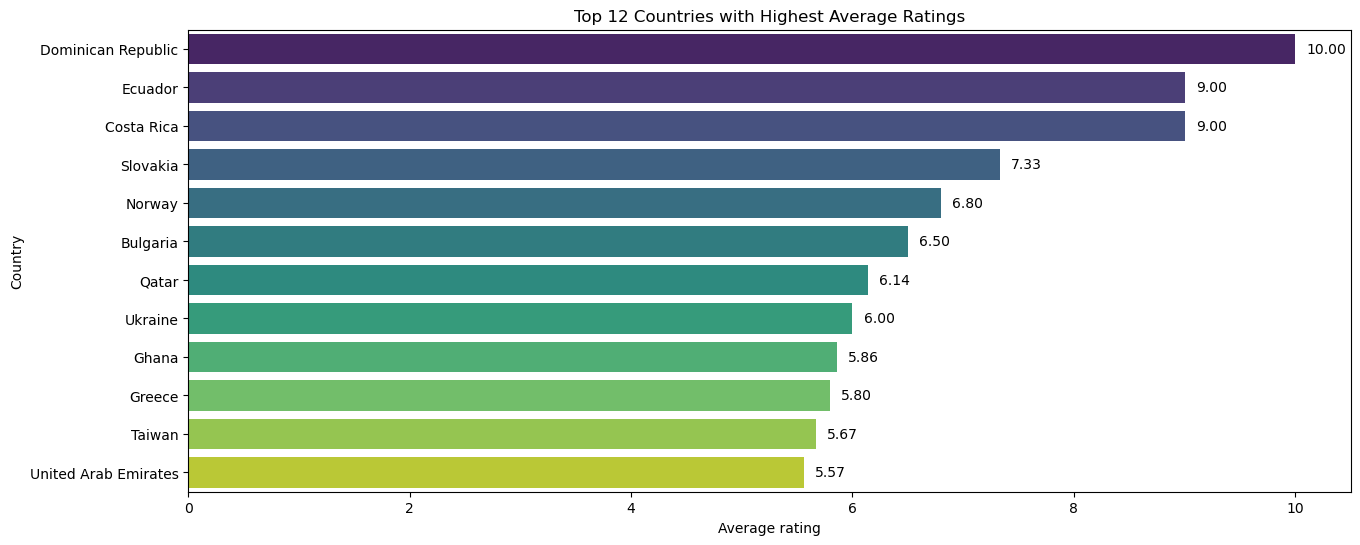

In [40]:
top_12_countries = test_groupby.sort_values(ascending=False).head(12)

plt.figure(figsize=(15,6))

sns.barplot(x=top_12_countries.values, y=top_12_countries.index, palette='viridis')

plt.xlabel('Average rating')
plt.ylabel('Country')
plt.title('Top 12 Countries with Highest Average Ratings')

for index, value in enumerate(top_12_countries.values):
    plt.text(value + 0.1, index, f'{value:.2f}', color='black', va="center")

plt.show()

In [41]:
df.date = pd.to_datetime(df.date)

In [42]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

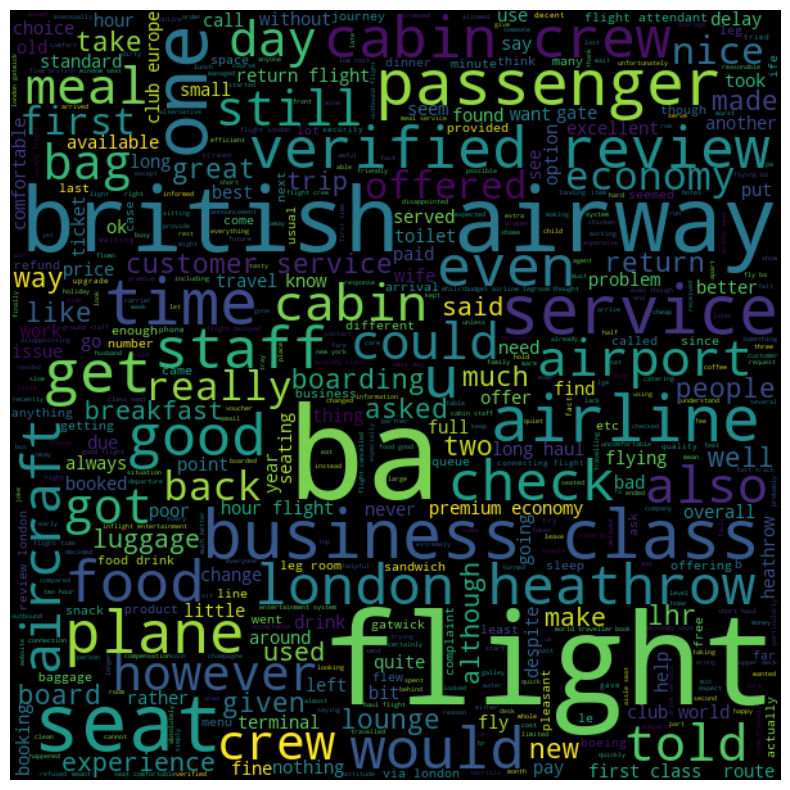

In [43]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

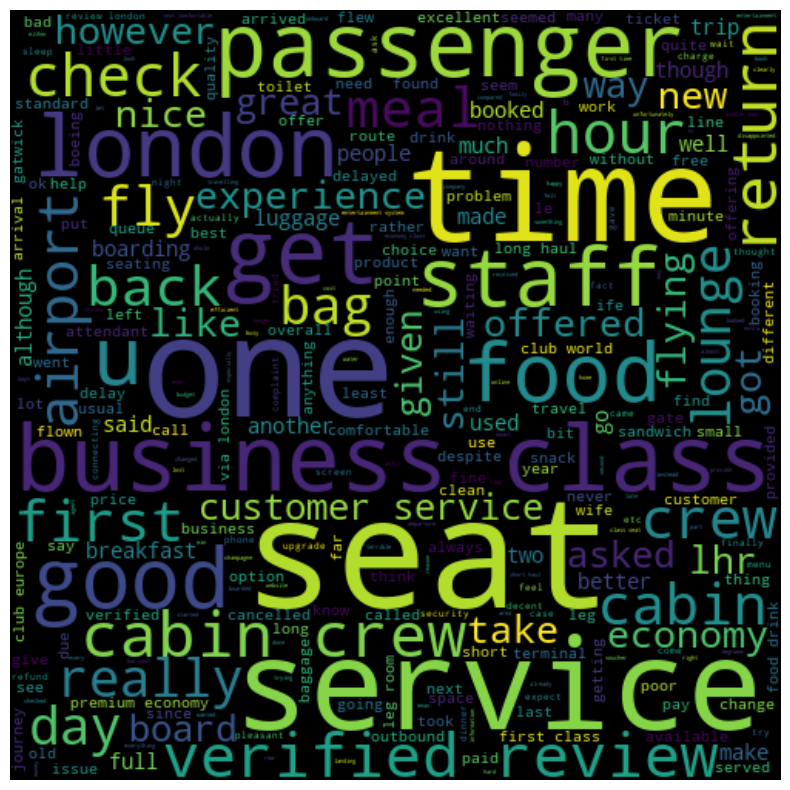

In [44]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'verified'),
  Text(16, 0, 'return'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'club'),
  Text(19, 0, 'customer')])

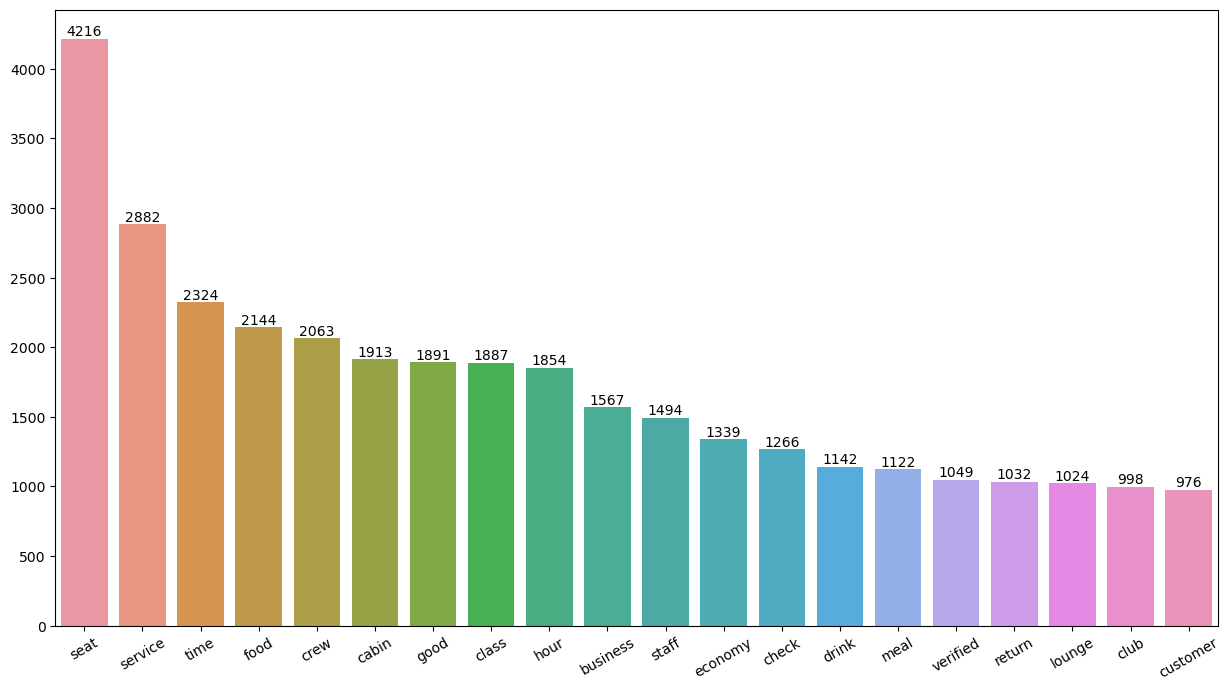

In [46]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

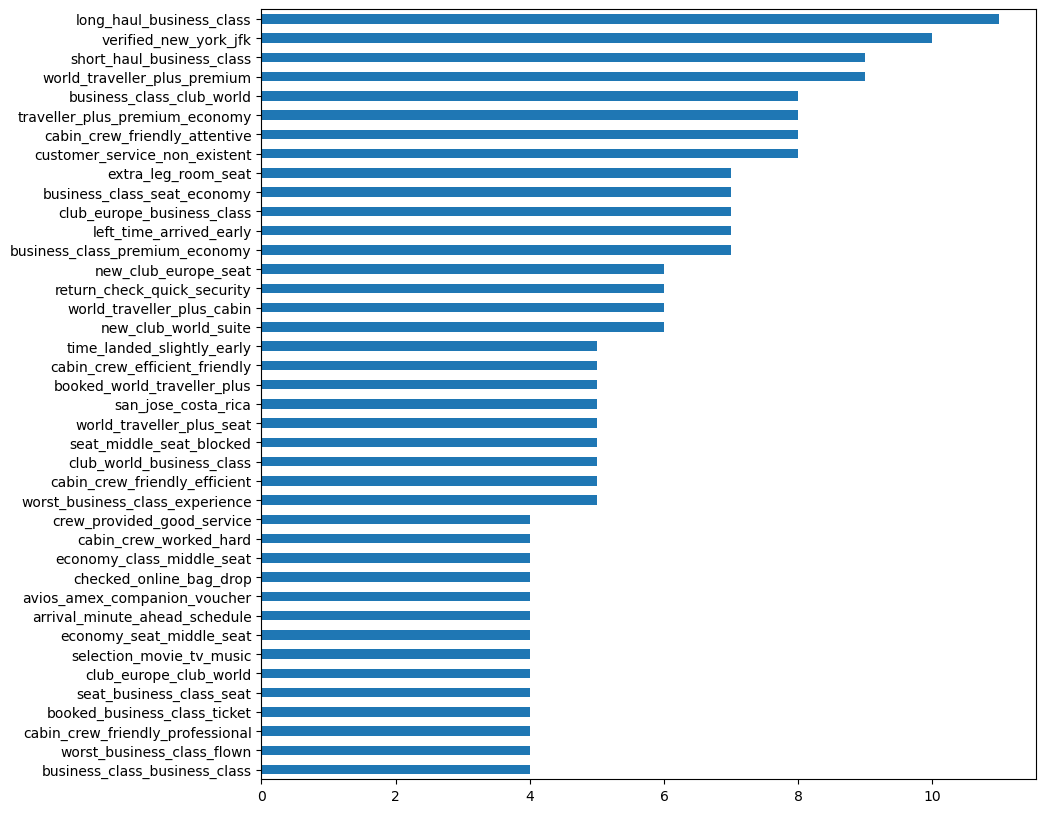

In [48]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [49]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

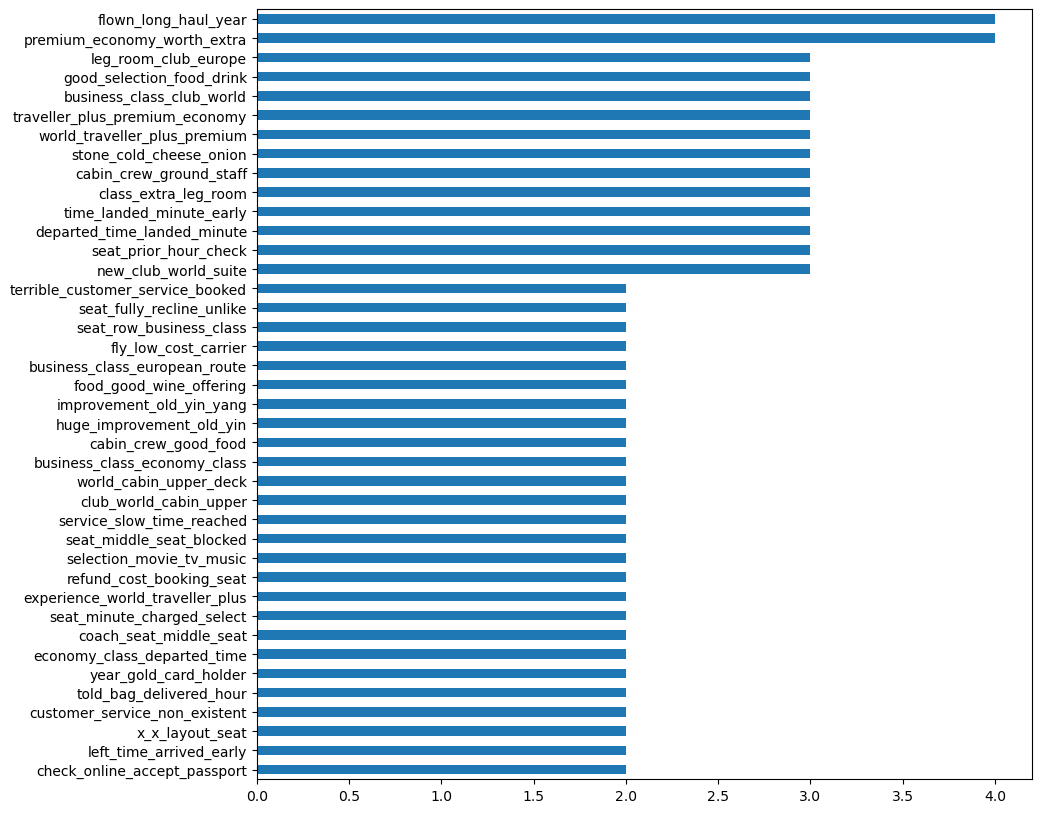

In [50]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

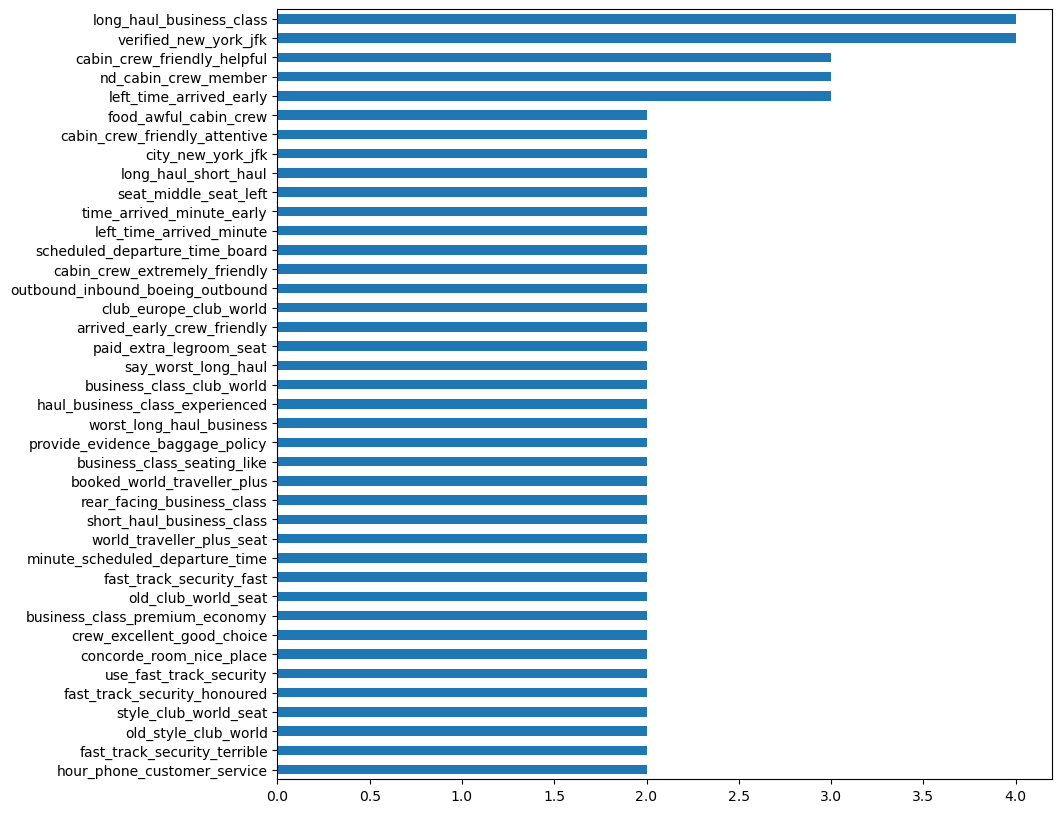

In [51]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

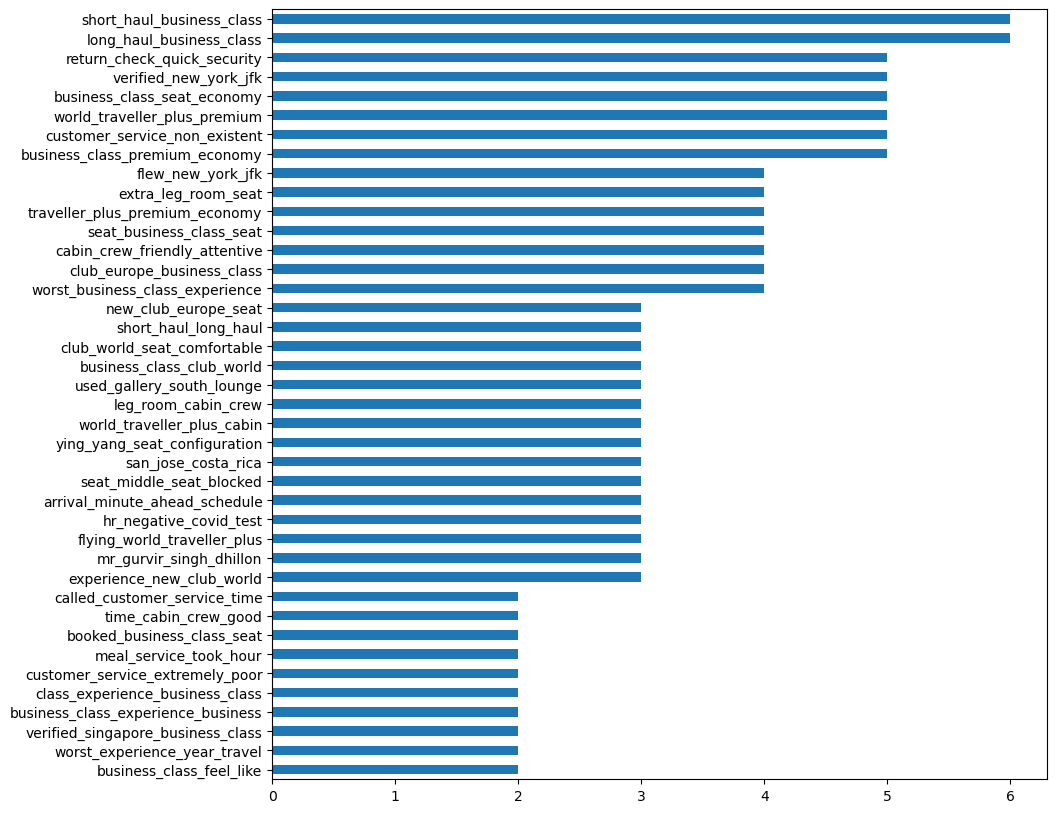

In [52]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [54]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [55]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2398 number of reviews between -0.2 and 0.2 polarity score
1399 number of reviews between -0.1 and 0.1 polarity score
